In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
class BayesClassifier:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = y_train.unique()
        self.apriori = {}
        self.mean = {}
        self.cov = {}
        self.inv_cov = {}
        self.det_cov = {}
        
    def fit(self):
        for c in self.classes:
            X_c = self.X_train[self.y_train == c]
            self.apriori[c] = len(X_c) / len(X_train)
            self.mean[c] = np.mean(X_c, axis=0)
            self.cov[c] = np.cov(X_c.T)
            self.inv_cov[c] = np.linalg.inv(self.cov[c])
            self.det_cov[c] = np.linalg.det(self.cov[c])
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test.values:
            probs = [self.calc_prob(x, c) for c in self.classes]
            y_pred.append(self.classes[np.argmax(probs)])
        return y_pred
    
    def calc_prob(self, x, c):
        mean = self.mean[c]
        inv_cov = self.inv_cov[c]
        det_cov = self.det_cov[c]
        prob = np.exp(-0.5 * (x - mean).T @ inv_cov @ (x - mean)) / np.power((2 * np.pi) ** len(x) * det_cov, 0.5)
        return prob * self.apriori[c]

In [22]:
def split_train_test(df, y_col):
    train_data, test_data = pd.DataFrame(), pd.DataFrame()
    for y in df[y_col].unique():
        df_y = df[df[y_col] == y]
        train_data = pd.concat([train_data, df_y[:40]], ignore_index=True)
        test_data = pd.concat([test_data, df_y[40:]], ignore_index=True)
    X_train, y_train = train_data.drop(y_col, axis=1), train_data[y_col]
    X_test, y_test = test_data.drop(y_col, axis=1), test_data[y_col]
    return X_train, y_train, X_test, y_test

In [23]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [24]:
def accuracy_by_class(y_true, y_pred):
    classes = y_true.unique()
    acc_by_class = {}
    for c in classes:
        y_true_c = y_true[y_true == c]
        y_pred_c = y_pred[y_true == c]
        acc_by_class[c] = accuracy(y_true_c, y_pred_c)
    return acc_by_class

In [25]:
iris_df = pd.read_csv('iris.csv').drop('Id', axis=1)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
X_train, y_train, X_test, y_test = split_train_test(iris_df, 'Species')
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 120
X_test: 30


In [27]:
bayes_classifier = BayesClassifier(X_train, y_train)
bayes_classifier.fit()

In [28]:
y_pred = bayes_classifier.predict(X_test)
result = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': y_pred})
result

,Actual Class,Predicted Class
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


In [29]:
acc = accuracy(y_test, y_pred)
acc_by_class = accuracy_by_class(y_test, pd.Series(y_pred))
print(f"Accuracy: {acc}")
print(f"Accuracy by class: {acc_by_class}")

Accuracy: 1.0
Accuracy by class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 1.0}


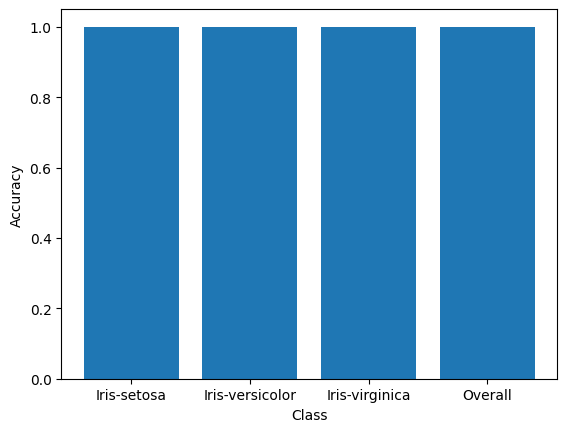

In [30]:
all_acc = {**acc_by_class, 'Overall':acc}
plt.bar(all_acc.keys(), all_acc.values())
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()